# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


#### Import necessary libraries

In [98]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from copy import deepcopy
plt.rcParams["figure.figsize"] = (8,8)


### Subsection 1

In [99]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    plt.xlabel("dimension_1", fontsize=16)
    plt.ylabel("dimension_2", fontsize=16)

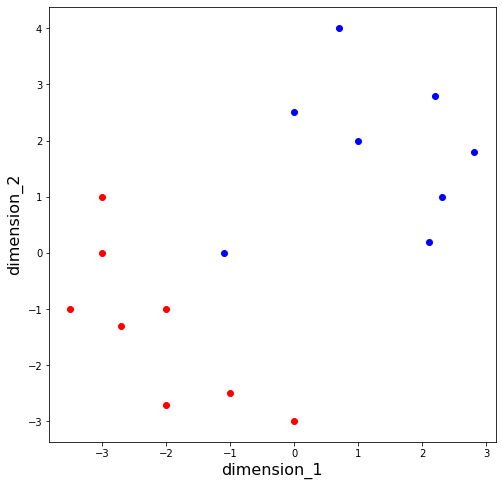

In [100]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In [101]:
def plot_dots(X, y):
    plot_points(X, y)
    return

In [102]:
def fetch_normal(W_vec):
    '''TO FIND NORMAL OF A VECTOR'''
    W_ans=[0,0]
    W_ans[0]=W_vec[1]
    W_ans[1]=-W_vec[0]
    return W_ans

In [103]:
def plot_line_using_w_and_b(W, b, plot_now, curr_label,line_style='-', line_color='black', abs_x=6):
    x_coeff=W[0]
    y_coeff=W[1]
    #print("recv is ", W)
    c_val=b
    # eqn: (x_coeff * x) + (y_coeff * y) + (c_val) = 0
    x_c = np.linspace(-abs_x, abs_x, 50000)
    y_c=np.array(list(map(lambda x:(-(x_coeff * x) - c_val)/y_coeff, x_c)))
    #print(x_c)
    #print(y_c)
    plt.plot(x_c,y_c, ':g', label=curr_label, color=line_color, linestyle=line_style)
    if plot_now:
        plt.show()

## =====================================

### SUBTASK
In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

###### Please print the values of w, b. 

#### Note: You are also required to upload a page of the derivation. You may also type it in markdown here. 

##### Note: You cannot use sklearn SVM functions here.**

## PLEASE CHECK PDF FOR DERIVATION

In [104]:
print(X.shape)
print(y.shape)

(16, 2)
(16,)


In [105]:
# Write your code here
def solve_svm_problem(X, y):
    num_dimensions=len(X[0])
    #Variables can be scalars, vectors, or matrices, meaning they are 0, 1, or 2 dimensional.
    ############################################
    # Vector variable with shape (num_dimensions,1)
    W=cp.Variable(num_dimensions)
    ########################################
    # A scalar variable.
    b = cp.Variable()
    #########################
    #print(W.shape)
    #print(b.shape)
    #############################
    target_objective=cp.Minimize(cp.square(cp.norm(W)))
    # as per documentation, multiply is elementwise multiplication https://www.cvxpy.org/api_reference/cvxpy.atoms.affine.html#multiply
    constraints = [cp.multiply(y,X@W+b)>=1]
    ##################################
    problem_obj=cp.Problem(target_objective, constraints)
    problem_obj.solve()
    ######################
    #print(problem_obj.__dict__)
    print("Problem status : ", problem_obj.status)
    W_opt_val=W.value
    b_opt_val=b.value
    print("W at optimality is ",W_opt_val )
    print("b at optimality is ",b_opt_val )
    return W_opt_val, b_opt_val

#### The values of W and b can be found in the below cell

In [106]:
W_opt_val, b_opt_val= solve_svm_problem(X , y)

Problem status :  optimal
W at optimality is  [-1.73913043 -1.30434783]
b at optimality is  -2.9130434778766117


##  =================================================

### NEXT SUBTASK

In the next cell you are required to visualize the boundary predicted by the solver. 
#### You may want to revise up on how to plot the a line given w, b. 
# Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [107]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

#### Initial plot (FINAL PLOT WITH MARGIN LINES CAN BE FOUND in the next section)

In [108]:
# Write your code here
def fetch_support_vecs(X, y, W, b):
    support_vecs=[]
    EPS=1e-4
    sup_y=[]
    for i, curr_elem in enumerate(X):
        abs_dist=y[i]*(W@curr_elem+b)
        #print(abs_dist)
        if abs_dist>=-1-EPS and abs_dist<=1+EPS:
            support_vecs.append(np.array(curr_elem))
            sup_y.append(y[i])
    return np.array(support_vecs), np.array(sup_y)

In [109]:
b_pos=b_opt_val-1
b_neg=b_opt_val+1

In [110]:
b_pos

-3.9130434778766117

In [111]:
b_neg

-1.9130434778766117

In [112]:
b_opt_val

array(-2.91304348)

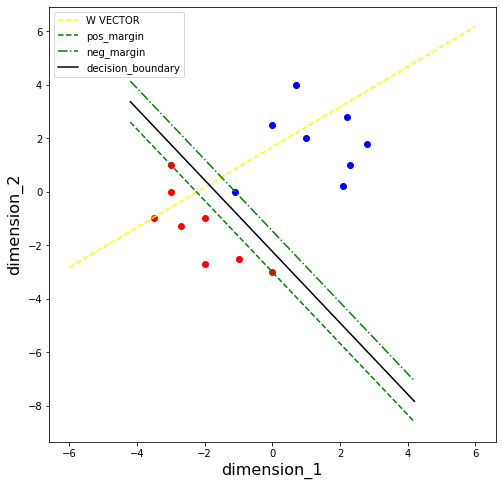

In [113]:
plot_dots(X,y)
plot_line_using_w_and_b(fetch_normal(W_opt_val),b_opt_val,False, "W VECTOR", line_style='--',line_color='yellow')

plot_line_using_w_and_b(W_opt_val, b_pos,False, "pos_margin","--",'green',4.2)
plot_line_using_w_and_b(W_opt_val, b_neg,False,"neg_margin","-.",'green',4.2)
plot_line_using_w_and_b(W_opt_val, b_opt_val,False, "decision_boundary",abs_x=4.2)
plt.legend()
plt.show()

## In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here.**

In [114]:
sup_X, sup_y=fetch_support_vecs(X, y, W_opt_val, b_opt_val)

In [115]:
type(sup_y)

numpy.ndarray

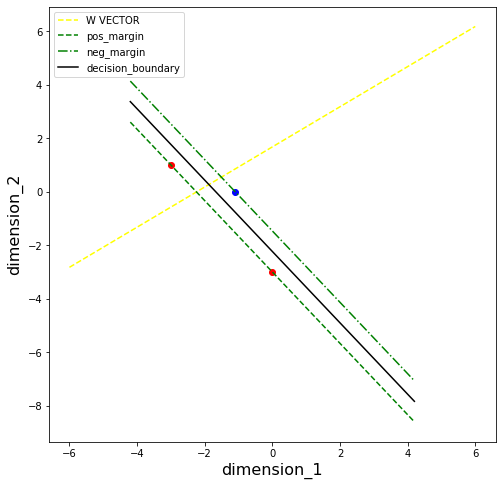

In [116]:
plot_dots(sup_X,sup_y)
plot_line_using_w_and_b(fetch_normal(W_opt_val),b_opt_val,False, "W VECTOR", line_style='--',line_color='yellow')

plot_line_using_w_and_b(W_opt_val, b_pos,False, "pos_margin","--",'green',4.2)
plot_line_using_w_and_b(W_opt_val, b_neg,False,"neg_margin","-.",'green',4.2)
plot_line_using_w_and_b(W_opt_val, b_opt_val,False, "decision_boundary",abs_x=4.2)
plt.legend()
plt.show()

## =================================================

## NEXT SUBTASK

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

## Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [117]:
# Re-create the Synthetic Data by adding the points and visualize the points

In [118]:
def add_elem(X, elem_to_add):
    arr_now=[]
    for curr_elem in X:
        if type(curr_elem)==np.ndarray:
            arr_now.append(list(curr_elem))
        else:
            arr_now.append(curr_elem)
    arr_now.append(elem_to_add)
    return np.array(arr_now)

In [119]:

X=add_elem(X, [-4,-10])
X=add_elem(X, [4,4])

y=add_elem(y, 1)
y=add_elem(y, -1)


In [120]:
X.shape

(18, 2)

In [121]:
y.shape

(18,)

#### After adding points

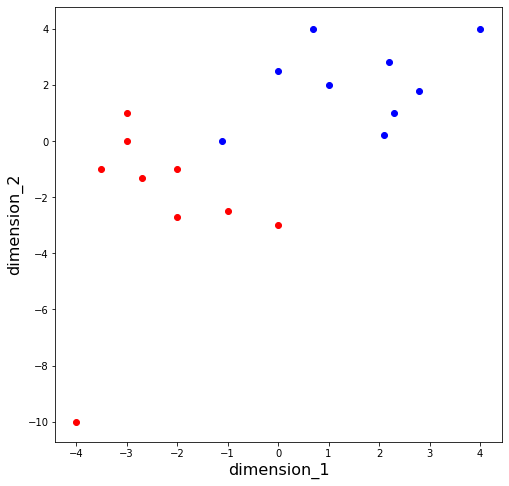

In [122]:
plot_points(X, y)
plt.show()

In [123]:
# Solve for the decision boundary using this modified dataset

In [124]:
W_opt_val, b_opt_val= solve_svm_problem(X , y)

Problem status :  optimal
W at optimality is  [-1.73913043 -1.30434783]
b at optimality is  -2.913043477965684


### DECISION BOUNDARY DOES NOT CHANGE
This is because the newly added points do not lie in the region between the 2 margins (from earlier) and hence, they DO NOT AFFECT THE DECISION BOUNDARY AT ALL. As a result, decision boundary does not change.

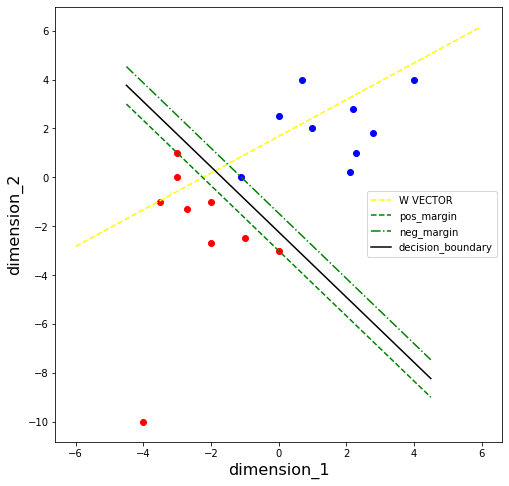

In [125]:
plot_dots(X,y)
plot_line_using_w_and_b(fetch_normal(W_opt_val),b_opt_val,False, "W VECTOR", line_style='--',line_color='yellow')

plot_line_using_w_and_b(W_opt_val, b_pos,False, "pos_margin","--",'green',4.5)
plot_line_using_w_and_b(W_opt_val, b_neg,False,"neg_margin","-.",'green',4.5)
plot_line_using_w_and_b(W_opt_val, b_opt_val,False, "decision_boundary",abs_x=4.5)
plt.legend()
plt.show()

## ======================================================

#### In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

# Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell.**

# NOTE: THe "C" I have used is normalized by the number of samples. [Already discussed with TA on TEAMS]

In [126]:
# Write your code here for C= 0.01

In [127]:
# Write your code here for C= 0.1

In [128]:
# Write your code here for C= 3

In [129]:
# Write your code here for C= 10

In [130]:
# Write your code here for C= 100

In [131]:
def solve_svm_soft_constraints(X, y,curr_c_val):

    num_dimensions=len(X[0])
    num_samples=X.shape[0]
    #print("num samples is ", num_samples)
    #print("curr c val is ", curr_c_val)
    #Variables can be scalars, vectors, or matrices, meaning they are 0, 1, or 2 dimensional.
    ############################################
    # Vector variable with shape (num_dimensions,1)
    W=cp.Variable(num_dimensions)
    psi=cp.Variable(num_samples)
    ########################################
    # A scalar variable.
    b = cp.Variable()
    #########################
    #print(W.shape)
    #print(b.shape)
    #############################
    reg = cp.square(cp.norm(W))
    
    ## https://www.cvxpy.org/api_reference/cvxpy.atoms.elementwise.html#pos
    # defn of "pos"
    tot_loss=cp.sum(psi)
    #print(tot_loss.shape)
    target_objective=cp.Minimize(0.5*reg+(curr_c_val/num_samples)*tot_loss)
    
    
    # as per documentation, multiply is elementwise multiplication https://www.cvxpy.org/api_reference/cvxpy.atoms.affine.html#multiply
    # Also, 
    constraints = [cp.multiply(y,X@W+b)>=1-psi, psi>=0]
    ##################################
    problem_obj=cp.Problem(target_objective, constraints)
    problem_obj.solve()
    ######################
    #print(problem_obj.__dict__)
    print("Problem status : ", problem_obj.status)
    W_opt_val=W.value
    b_opt_val=b.value
    print("W at optimality is ",W_opt_val )
    print("b at optimality is ",b_opt_val )

    print("Optimal val is ", problem_obj.value)
    print("total psi loss: ", tot_loss.value)
    #print("reg is : ",reg.value)
    #print("coeff is ", curr_c_val*num_samples)
    #print("psi is ", psi.value)

    return W_opt_val, b_opt_val

In [132]:
#possible_c_vals=[0.00001,0.01, 0.1, 3, 10, 100,1000000000]
possible_c_vals=[0.01, 0.1, 3, 10, 100,100000]

args_dict={}

Current C value is  0.01
Problem status :  optimal
W at optimality is  [-0.01955499 -0.02155507]
b at optimality is  -0.0028278802309064164
Optimal val is  0.00957646916649491
total psi loss:  16.47532769862912


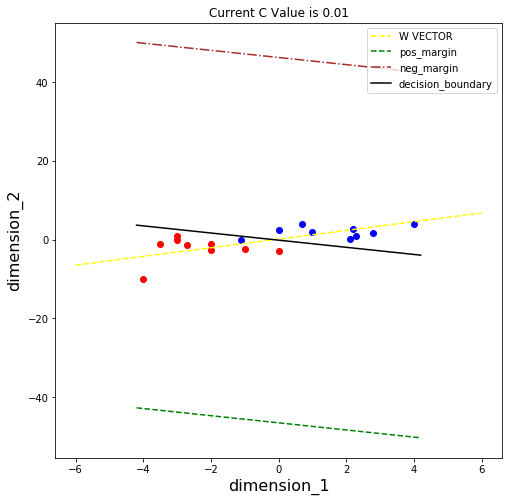


################

Current C value is  0.1
Problem status :  optimal
W at optimality is  [-0.15111096 -0.13777733]
b at optimality is  -0.03593672284199448
Optimal val is  0.06798024699053837
total psi loss:  8.472904074223392


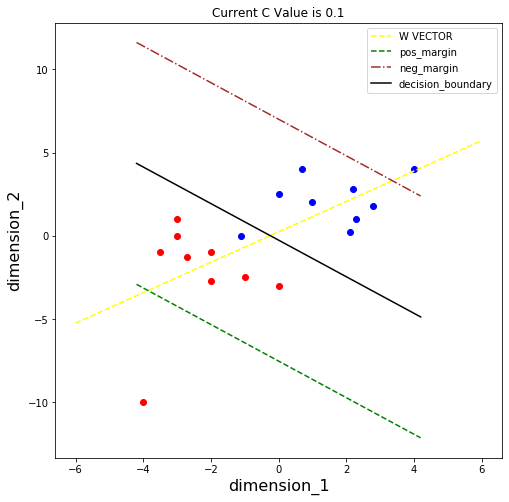


################

Current C value is  3
Problem status :  optimal
W at optimality is  [-0.3982684  -0.36363636]
b at optimality is  -0.09090909091323358
Optimal val is  0.41324562882901467
total psi loss:  1.606926406943422


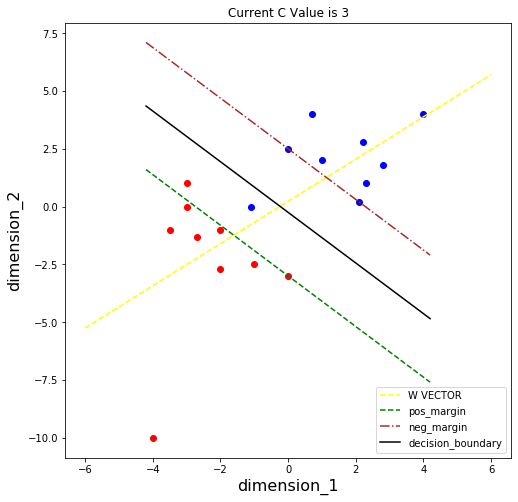


################

Current C value is  10
Problem status :  optimal
W at optimality is  [-0.48484849 -0.36363636]
b at optimality is  -0.09090909133793494
Optimal val is  0.9850015304306332
total psi loss:  1.4424242422834694


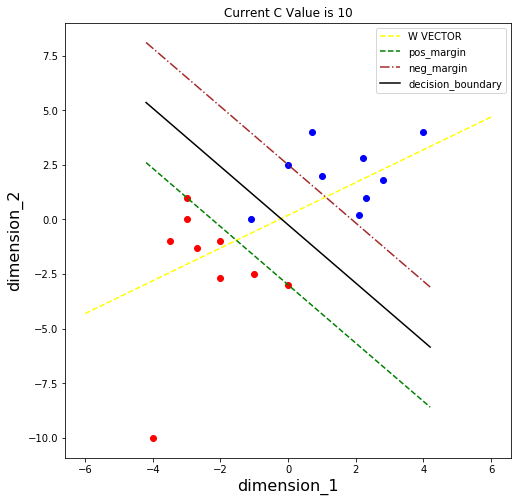


################

Current C value is  100
Problem status :  optimal
W at optimality is  [-1.73913043 -1.30434783]
b at optimality is  -2.9130434782543193
Optimal val is  2.362948960298518
total psi loss:  6.846042935942476e-12


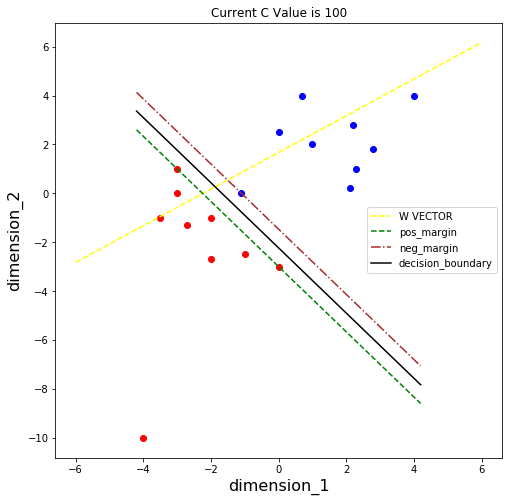


################

Current C value is  100000
Problem status :  optimal
W at optimality is  [-1.73913043 -1.30434783]
b at optimality is  -2.9130434785547568
Optimal val is  2.3629489591420554
total psi loss:  -2.5445498094978967e-13


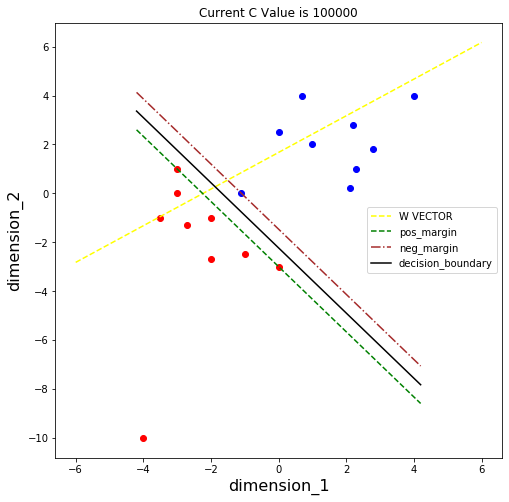


################



In [133]:
for curr_c_val in possible_c_vals:
    print("Current C value is ", curr_c_val)
    W_opt_val, b_opt_val= solve_svm_soft_constraints(X , y, curr_c_val)
    args_dict[str(curr_c_val)]={"W_optimal":deepcopy(W_opt_val),"b_opt_val":b_opt_val }
    # Write your code here
    plot_dots(X,y)
    #pos_x, neg_x = fetch_points_at_boundary(X, y, W_opt_val , b_opt_val)
    b_pos=b_opt_val-1
    b_neg=b_opt_val+1
    plot_line_using_w_and_b(fetch_normal(W_opt_val),b_opt_val,False, "W VECTOR", line_style='--',line_color='yellow')

    plot_line_using_w_and_b(W_opt_val, b_pos,False, "pos_margin","--",'green',4.2)
    plot_line_using_w_and_b(W_opt_val, b_neg,False,"neg_margin","-.",'brown',4.2)
    plot_line_using_w_and_b(W_opt_val, b_opt_val,False, "decision_boundary",abs_x=4.2)
    plt.legend()
    plt.title(f"Current C Value is {curr_c_val}")
    plt.show()
    print("\n################\n")

In [134]:
len(possible_c_vals)

6

In [135]:
color_list=['#e6194B', '#3cb44b', '#000000', '#f58231', '#911eb4', '#42d4f4', '#f032e6']

In [136]:
dash_list=['--','-.',':','-']

# As we can see, as value of C changes; the boundary also changes.

This is because C represents the "slack" and controls the penalty magnitude to be imposed on points who do not lie on the correct side of their respective margins.
When C is small, classification mistakes are given less importance and focus is more on maximizing the margin, whereas when C is large, the focus is more on avoiding misclassification at the expense of keeping the margin small.

The idea of slack allows us to get a wider margin with the expense of mis-classifying a few points.
This is useful to account for some outliers (noise) close to the decision boundary and also in the case when points are not linearly separable.

From below diagram, we can see that the slope continuoly changes with increasing C.

* At C=0.01, penalty is very less and hence,  all points are allowed to lie within margin lines and the margin is tried to be kept as high as possible.
* At C=0.1, penalty factor increases and margin decrases alongwith 2 points noew being outside margin.
* AT C=3 and 10, all points except 2 of them are outside margin boundary. THese 2 points are allowed to lie within boundary (with the blue point even closer to the RED MARGIN LINE than the BLUE ONE). However, the extent of blue's poits penalty decreases with C =3. At C=10, only one point is within the margin.

* AT C=100, the penalty for BLUE POINT AT (-1,0 becomes very high and cannot be afforded. Hence, margin has to decrease to ensure no PENALTY IS ACTUALLY IMPOSED.

* But the slope for C=100 and C=10,000 is the same. (This is because the C=100 is enough to make sure that the penalty for classification DOMINATES any possible increase in margin width) and hence, result is same as C=10,000.


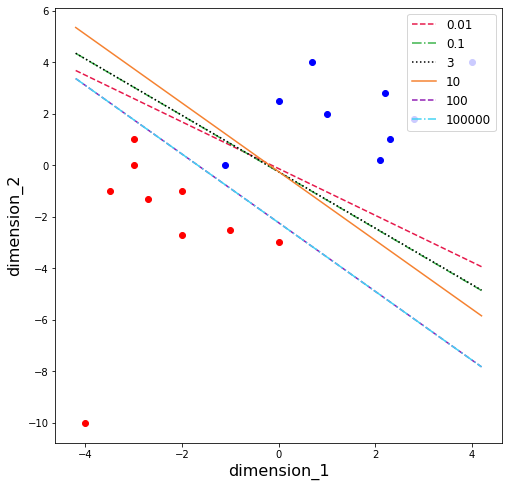


################



In [137]:
plot_dots(X,y)

for idx, curr_c_val in enumerate(possible_c_vals):
    #print("Current C value is ", curr_c_val)
    W_opt_val, b_opt_val=args_dict[str(curr_c_val)]['W_optimal'],args_dict[str(curr_c_val)]['b_opt_val']
    args_dict[str(curr_c_val)]={"W_optimal":deepcopy(W_opt_val),"b_opt_val":b_opt_val }
    plot_line_using_w_and_b(W_opt_val, b_opt_val,False, f"{curr_c_val}",abs_x=4.2, line_color=color_list[idx], line_style=dash_list[idx%(len(dash_list))])
plt.legend(fontsize=12,loc=1)
#plt.title(f"Current C Value is {curr_c_val}")
plt.show()
print("\n################\n")

## Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why? Show your results by appropriate plots?

In [144]:
# Write your code here
def filter_points_at_boundary(X, y, W, b):
    points_arr=[]  
    X_mod=[]
    y_mod=[]
    for i, curr_elem in enumerate(X):
        abs_distance_from_boundary=y[i]*(W@curr_elem+b)
        #print(abs_distance_from_boundary)
        if abs(abs_distance_from_boundary-1)<1e-4:
            print("REMOVING ", curr_elem)
            continue
        else:
            X_mod.append(curr_elem)
            y_mod.append(y[i])
    return np.array(X_mod), np.array(y_mod)

In [145]:
args_dict

{'0.01': {'W_optimal': array([-0.01955499, -0.02155507]),
  'b_opt_val': array(-0.00282788)},
 '0.1': {'W_optimal': array([-0.15111096, -0.13777733]),
  'b_opt_val': array(-0.03593672)},
 '3': {'W_optimal': array([-0.3982684 , -0.36363636]),
  'b_opt_val': array(-0.09090909)},
 '10': {'W_optimal': array([-0.48484849, -0.36363636]),
  'b_opt_val': array(-0.09090909)},
 '100': {'W_optimal': array([-1.73913043, -1.30434783]),
  'b_opt_val': array(-2.91304348)},
 '100000': {'W_optimal': array([-1.73913043, -1.30434783]),
  'b_opt_val': array(-2.91304348)}}

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

# 3 POINTS ARE GETTING REMOVED

In [146]:
# Write your Code here
X_mod, y_mod=filter_points_at_boundary(X, y,args_dict['100']['W_optimal'],args_dict['100']['b_opt_val'] )

REMOVING  [-3.  1.]
REMOVING  [ 0. -3.]
REMOVING  [-1.1  0. ]


In [147]:
len(X_mod)

15

## we see that the boundary has been changed.
SInce we are removing support vectors of older boundary, it becomes possible to ENLARGE THE MARGIN.
Ealier, we were not able to ENLARGE THE MARGIN because in that case, the 3 removed points (coordinates mentioned in previous cell) would have lied inside the margin, leading to a penalty with high cost (since C=100).
But on removing these points, the MARGIN can be ENLARGED by shifting the decision boundary without fear of any penalty.

THE PENALTY for only points within the margin has been taken care of by using PSI>=0 as a constraint in the solver

Problem status :  optimal
W at optimality is  [-0.38493724 -0.35146444]
b at optimality is  -0.12133891212139404
Optimal val is  0.13585196324416207
total psi loss:  -2.569885208330863e-11


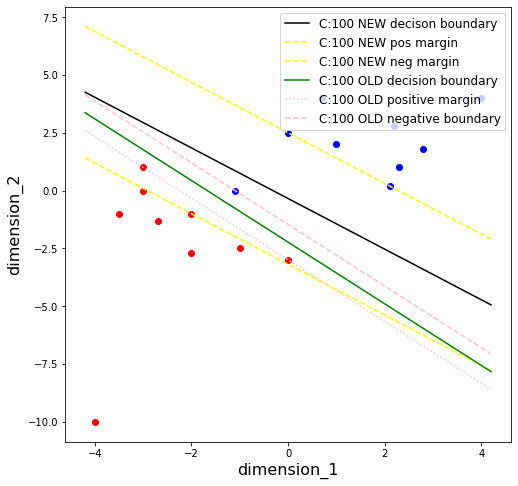


################



In [152]:
plot_dots(X,y)
curr_c_val=100

W_opt_val, b_opt_val=solve_svm_soft_constraints(X_mod , y_mod, curr_c_val)
plot_line_using_w_and_b(W_opt_val, b_opt_val,False, f"C:{curr_c_val} NEW decison boundary",abs_x=4.2, line_color="black", line_style='-')

plot_line_using_w_and_b(W_opt_val, b_opt_val-1,False, f"C:{curr_c_val} NEW pos margin",abs_x=4.2, line_color="yellow", line_style='--')
plot_line_using_w_and_b(W_opt_val, b_opt_val+1,False, f"C:{curr_c_val} NEW neg margin",abs_x=4.2, line_color="yellow", line_style='--')

plot_line_using_w_and_b(args_dict['100']['W_optimal'],args_dict['100']['b_opt_val'],False, f"C:{curr_c_val} OLD decision boundary",abs_x=4.2, line_color="green", line_style='-')
plot_line_using_w_and_b(args_dict['100']['W_optimal'],args_dict['100']['b_opt_val']-1,False, f"C:{curr_c_val} OLD positive margin",abs_x=4.2, line_color="pink", line_style=':')
plot_line_using_w_and_b(args_dict['100']['W_optimal'],args_dict['100']['b_opt_val']+1,False, f"C:{curr_c_val} OLD negative boundary",abs_x=4.2, line_color="pink", line_style='--')

plt.legend(fontsize=12,loc=1)
#plt.title(f"Current C Value is {curr_c_val}")
plt.show()
print("\n################\n")

## ==============================================

# PLEASE FIND SVM PART 2 in another NOTEBOOK